# –ó–∞–¥–∞—á–∞:
### –ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å, –∫–∞–∫–∏–µ —Ñ–∞–∫—Ç–æ—Ä—ã —Å–∏–ª—å–Ω–µ–µ –≤—Å–µ–≥–æ –≤–ª–∏—è—é—Ç –Ω–∞ –æ—Ç—Ç–æ–∫ –∫–ª–∏–µ–Ω—Ç–æ–≤ (Exited), –∏ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º—É—é –º–æ–¥–µ–ª—å.

# –ë–∏–±–ª–∏–æ—Ç–µ–∫–∏
---

In [1]:
import shutil
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import kagglehub
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score,roc_curve
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import optuna
import shap


import warnings
warnings.filterwarnings("ignore")

In [2]:
random_seed=42

# –ì—Ä—É–∑–∏–º –¥–∞—Ç–∞—Å–µ—Ç
---

In [3]:
# Download latest version
path = kagglehub.dataset_download("shantanudhakadd/bank-customer-churn-prediction")

target_dir = "dataset"

os.makedirs(target_dir,exist_ok=True)

for file in os.listdir(path):
    shutil.move(os.path.join(path,file),os.path.join(target_dir,file))

# –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º
---

In [4]:
data = pd.read_csv("dataset\\Churn_Modelling.csv")
data

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [5]:
desc_data = pd.DataFrame(index = list(data))
desc_data["type"] = data.dtypes
desc_data["amount"] = data.count()
desc_data["num_unique"] = [len(data[column].unique()) for column in data.columns]
desc_data["num_null"] = data.isnull().sum()
desc_data['min'] = data.min()
desc_data['max'] = data.max()
desc_data


type  amount  num_unique  num_null       min        max
RowNumber          int64   10000       10000         0         1      10000
CustomerId         int64   10000       10000         0  15565701   15815690
Surname           object   10000        2932         0     Abazu     Zuyeva
CreditScore        int64   10000         460         0       350        850
Geography         object   10000           3         0    France      Spain
Gender            object   10000           2         0    Female       Male
Age                int64   10000          70         0        18         92
Tenure             int64   10000          11         0         0         10
Balance          float64   10000        6382         0       0.0  250898.09
NumOfProducts      int64   10000           4         0         1          4
HasCrCard          int64   10000           2         0         0          1
IsActiveMember     int64   10000           2         0         0          1
EstimatedSalary  float64   10000        9999         0     11.58  199992.48
Exited             int64   10000           2         0         0          1

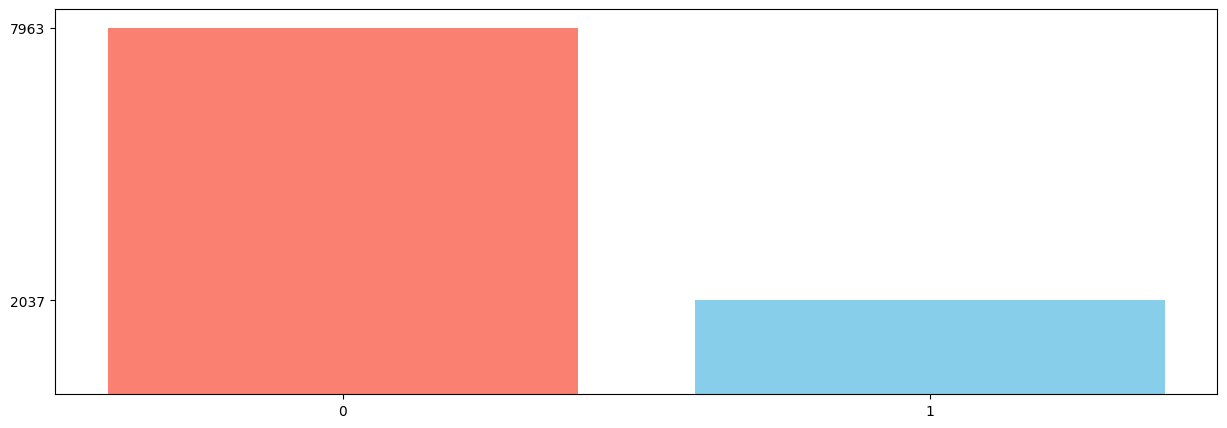

–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ Exited: 20.37%
–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ NotExited: 79.63%


In [6]:
plt.figure(figsize=(15,5))

exited_count = data["Exited"].value_counts()
plt.bar(exited_count.index,exited_count.values,color = ["salmon","skyblue"])
plt.xticks(exited_count.index)
plt.yticks(exited_count.values)

plt.show()

print(f"–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ Exited: {(exited_count[1]/exited_count.sum() * 100):.2f}%")
print(f"–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ NotExited: {(exited_count[0]/exited_count.sum() * 100):.2f}%")

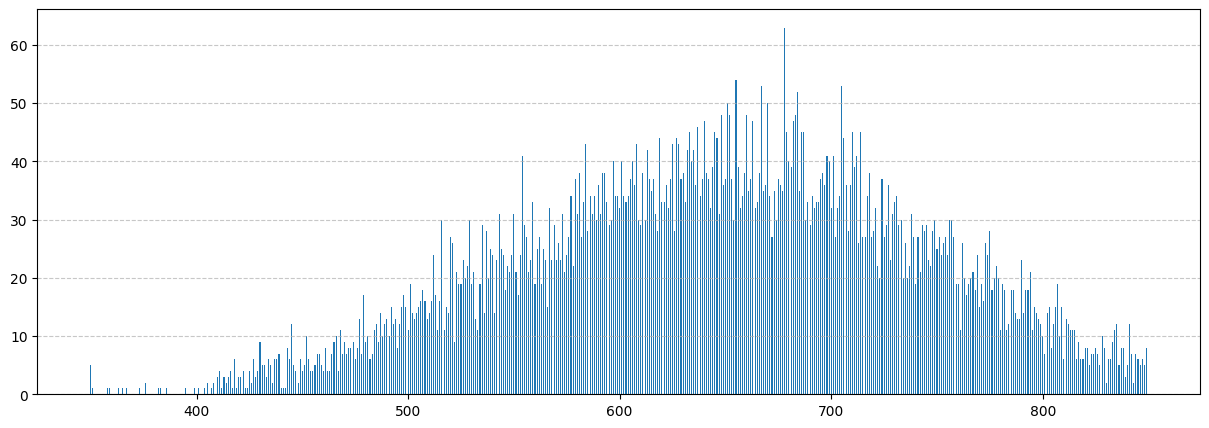

CreditScore
350      5
351      1
358      1
359      1
363      1
      ... 
846      5
847      6
848      5
849      8
850    233
Name: count, Length: 460, dtype: int64


In [7]:
#—É–±–∏—Ä–∞–µ–º –ø–æ—Å–ª–µ–¥–Ω–∏–π —ç–ª–µ–º–µ–Ω—Ç, —Ç–∫ –æ–Ω –¥–µ–ª–∞–µ—Ç –≥—Ä–∞—Ñ–∏–∫ –Ω–µ—á–∏—Ç–∞–±–µ–ª—å–Ω—ã–º –∏–∑-–∑–∞ —Å–≤–æ–µ–≥–æ –∫–æ–ª-–≤–æ(233)
creditscore_count = data["CreditScore"].value_counts().sort_index()
score_to_bar = creditscore_count[:-1]

plt.figure(figsize=(15,5))

plt.bar(score_to_bar.index,score_to_bar.values,width=0.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

print(creditscore_count)

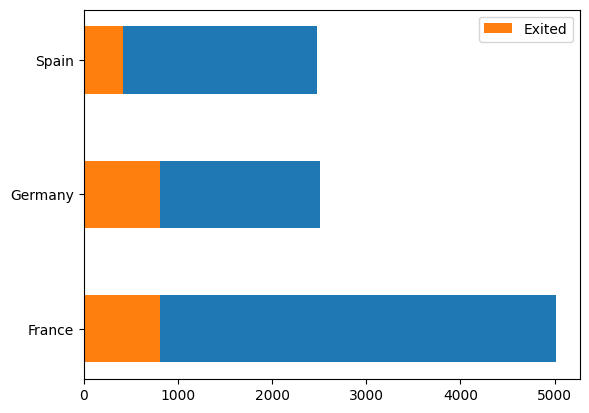

–í—Å–µ–≥–æ France: 5014
–í—Å–µ–≥–æ Exited_France: 810
–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ France –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤: 50.14%
–û—Ç–Ω–æ—à–µ–Ω–∏–µ Exited_France –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ Exited –≤ France : 16.15%
        
–í—Å–µ–≥–æ Germany: 2509
–í—Å–µ–≥–æ Exited_Germany: 814
–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ Germany –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤: 25.09%
–û—Ç–Ω–æ—à–µ–Ω–∏–µ Exited_Germany –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ Exited –≤ Germany : 32.44%
        
–í—Å–µ–≥–æ Spain: 2477
–í—Å–µ–≥–æ Exited_Spain: 413
–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ Spain –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤: 24.77%
–û—Ç–Ω–æ—à–µ–Ω–∏–µ Exited_Spain –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ Exited –≤ Spain : 16.67%
        


In [8]:
geography_count = data["Geography"].value_counts().sort_index()
exited_by_country = data[data["Exited"]==1]["Geography"].value_counts().sort_index()
#print(geography_count,exited_by_country)

fig,ax = plt.subplots()

bar1 = ax.barh(geography_count.index,geography_count.values,height=0.5)
bar2 = ax.barh(exited_by_country.index,exited_by_country.values,height=0.5,label = 'Exited')

plt.legend()
plt.show()

for i in range(len(geography_count.index)):
    print(f"""–í—Å–µ–≥–æ {geography_count.index[i]}: {geography_count[i]}
–í—Å–µ–≥–æ Exited_{geography_count.index[i]}: {exited_by_country[i]}
–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ {geography_count.index[i]} –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤: {(geography_count[i]/geography_count.sum() * 100):.2f}%
–û—Ç–Ω–æ—à–µ–Ω–∏–µ Exited_{geography_count.index[i]} –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ Exited –≤ {geography_count.index[i]} : {(exited_by_country[i]/geography_count[i] * 100):.2f}%
        """)


Gender
Female    4543
Male      5457
Name: count, dtype: int64 Gender
Female    1139
Male       898
Name: count, dtype: int64


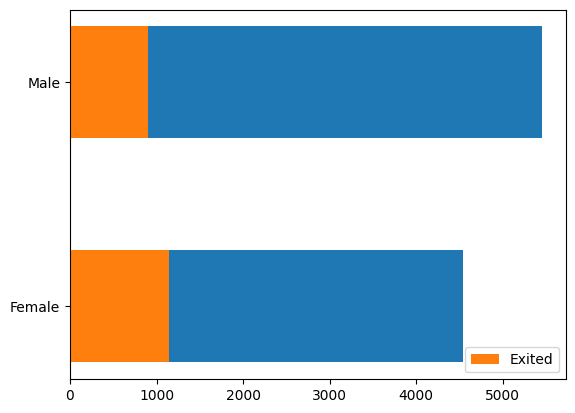

–í—Å–µ–≥–æ Female: 4543
–í—Å–µ–≥–æ Exited_Female: 1139
–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ Female –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤: 45.43%
–û—Ç–Ω–æ—à–µ–Ω–∏–µ Exited_Female –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ Exited —Å—Ä–µ–¥–∏ Female: 25.07%
        
–í—Å–µ–≥–æ Male: 5457
–í—Å–µ–≥–æ Exited_Male: 898
–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ Male –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤: 54.57%
–û—Ç–Ω–æ—à–µ–Ω–∏–µ Exited_Male –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ Exited —Å—Ä–µ–¥–∏ Male: 16.46%
        


In [9]:
gender_count = data["Gender"].value_counts().sort_index()
exited_by_gender = data[data["Exited"]==1]["Gender"].value_counts().sort_index()
print(gender_count,exited_by_gender)

fig,ax = plt.subplots()

bar1 = ax.barh(gender_count.index,gender_count.values,height=0.5)
bar2 = ax.barh(exited_by_gender.index,exited_by_gender.values,height=0.5,label = 'Exited')

plt.legend()
plt.show()

for i in range(len(gender_count.index)):
    print(f"""–í—Å–µ–≥–æ {gender_count.index[i]}: {gender_count[i]}
–í—Å–µ–≥–æ Exited_{gender_count.index[i]}: {exited_by_gender[i]}
–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ {gender_count.index[i]} –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤: {(gender_count[i]/gender_count.sum() * 100):.2f}%
–û—Ç–Ω–æ—à–µ–Ω–∏–µ Exited_{gender_count.index[i]} –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ Exited —Å—Ä–µ–¥–∏ {gender_count.index[i]}: {(exited_by_gender[i]/gender_count[i] * 100):.2f}%
        """)


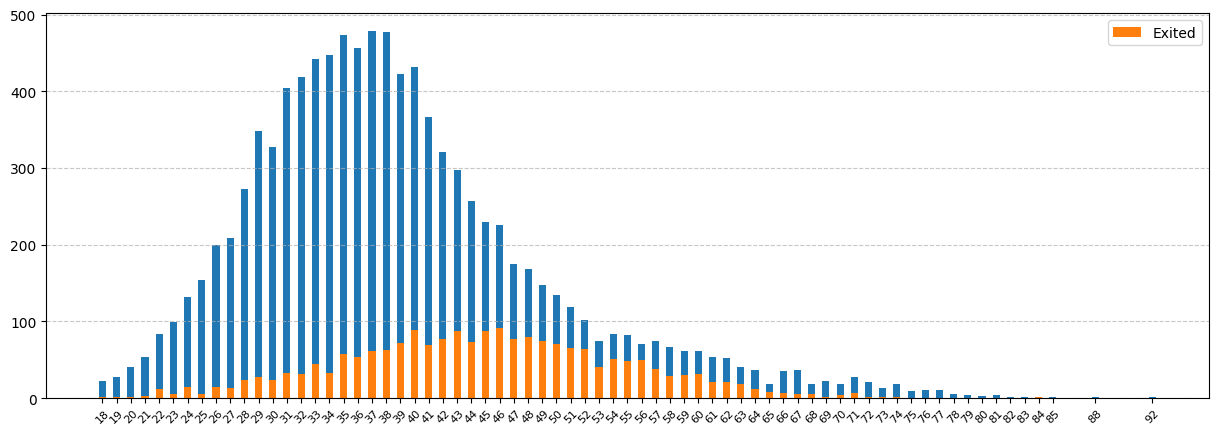

Age
84    1
19    1
73    1
72    1
74    1
69    2
18    2
20    2
21    3
70    4
Name: count, dtype: int64 Age
39    72
44    73
49    75
47    77
42    77
48    80
45    87
43    88
40    89
46    91
Name: count, dtype: int64


In [10]:
age_counts = data['Age'].value_counts().sort_index()
exited_by_age = data[data["Exited"]==1]["Age"].value_counts().sort_index()


fig,ax = plt.subplots(figsize=(15, 5))

bar1 = ax.bar(age_counts.index,age_counts.values,width=0.5)
bar2 = ax.bar(exited_by_age.index,exited_by_age.values,width=0.5,label = 'Exited')

plt.xticks(age_counts.index,rotation=45,fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend()
plt.show()

exited_by_age_first_three = exited_by_age.sort_values()[:10]
exited_by_age_last_three = exited_by_age.sort_values()[-10:]
print(exited_by_age_first_three,exited_by_age_last_three)
#–º–æ–∂–µ–º –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ —É—Ö–æ–¥—è—Ç –ª—é–¥–∏ –≤ –≤–æ–∑—Ä–∞—Å—Ç–µ 40-50 –ª–µ—Ç

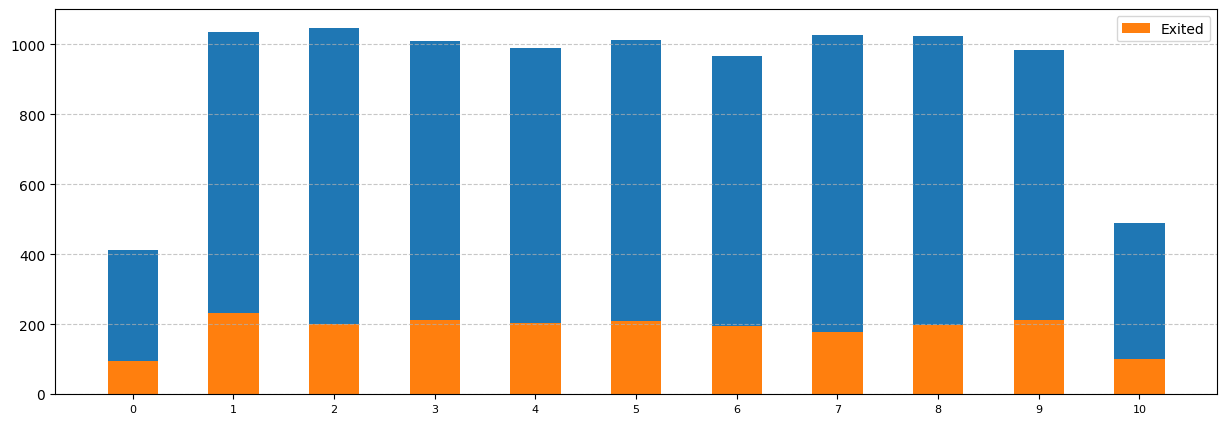

Tenure  –í—Å–µ–≥–æ –∫–ª–∏–µ–Ω—Ç–æ–≤  –í—Å–µ–≥–æ Exited  –ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤  \
0        0             413            95                              4.13   
1        1            1035           232                             10.35   
2        2            1048           201                             10.48   
3        3            1009           213                             10.09   
4        4             989           203                              9.89   
5        5            1012           209                             10.12   
6        6             967           196                              9.67   
7        7            1028           177                             10.28   
8        8            1025           197                             10.25   
9        9             984           213                              9.84   
10      10             490           101                              4.90   

    –ü—Ä–æ—Ü–µ–Ω—Ç Exited —Å—Ä–µ–¥–∏ —ç—Ç–∏—Ö  
0                       23.00  
1                       22.42  
2                       19.18  
3                       21.11  
4                       20.53  
5                       20.65  
6                       20.27  
7                       17.22  
8                       19.22  
9                       21.65  
10                      20.61

In [11]:
#Tenure - From how many years customer is in bank

tenure_counts = data['Tenure'].value_counts().sort_index()
exited_by_tenure = data[data["Exited"]==1]["Tenure"].value_counts().sort_index()

fig,ax = plt.subplots(figsize=(15, 5))

bar1 = ax.bar(tenure_counts.index,tenure_counts.values,width=0.5)
bar2 = ax.bar(exited_by_tenure.index,exited_by_tenure.values,width=0.5,label = 'Exited')

plt.xticks(tenure_counts.index,fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend()
plt.show()

tenure_data = []

for i in range(len(tenure_counts.index)):
    tenure = tenure_counts.index[i]
    total = tenure_counts[i]
    exited = exited_by_tenure[i]
    total_percent = ((tenure_counts[i] / tenure_counts.sum()) * 100).round(2)
    exited_percent = ((exited_by_tenure[i] / tenure_counts[i]) * 100).round(2)
    
    tenure_data.append({
        'Tenure': tenure,
        '–í—Å–µ–≥–æ –∫–ª–∏–µ–Ω—Ç–æ–≤': total,
        '–í—Å–µ–≥–æ Exited': exited,
        '–ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤': total_percent,
        '–ü—Ä–æ—Ü–µ–Ω—Ç Exited —Å—Ä–µ–¥–∏ —ç—Ç–∏—Ö': exited_percent
    })

df = pd.DataFrame(tenure_data)
df

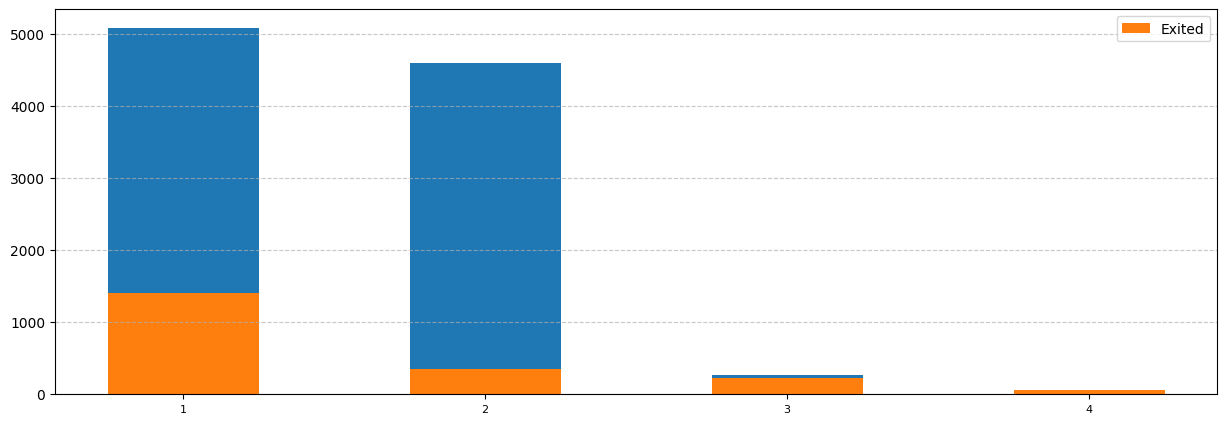

–í—Å–µ–≥–æ 1: 5084
–í—Å–µ–≥–æ Exited_1: 1409
–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ 1 –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤: 50.84%
–û—Ç–Ω–æ—à–µ–Ω–∏–µ Exited_1 –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ Exited —Å—Ä–µ–¥–∏ 1: 27.71%
        
–í—Å–µ–≥–æ 2: 4590
–í—Å–µ–≥–æ Exited_2: 348
–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ 2 –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤: 45.90%
–û—Ç–Ω–æ—à–µ–Ω–∏–µ Exited_2 –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ Exited —Å—Ä–µ–¥–∏ 2: 7.58%
        
–í—Å–µ–≥–æ 3: 266
–í—Å–µ–≥–æ Exited_3: 220
–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ 3 –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤: 2.66%
–û—Ç–Ω–æ—à–µ–Ω–∏–µ Exited_3 –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ Exited —Å—Ä–µ–¥–∏ 3: 82.71%
        
–í—Å–µ–≥–æ 4: 60
–í—Å–µ–≥–æ Exited_4: 60
–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ 4 –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤: 0.60%
–û—Ç–Ω–æ—à–µ–Ω–∏–µ Exited_4 –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ Exited —Å—Ä–µ–¥–∏ 4: 100.00%
        


In [13]:
numproducts_counts = data['NumOfProducts'].value_counts().sort_index()
exited_by_numproducts = data[data["Exited"]==1]["NumOfProducts"].value_counts().sort_index()

fig,ax = plt.subplots(figsize=(15, 5))

bar1 = ax.bar(numproducts_counts.index,numproducts_counts.values,width=0.5)
bar2 = ax.bar(exited_by_numproducts.index,exited_by_numproducts.values,width=0.5,label = 'Exited')

plt.xticks(numproducts_counts.index,fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend()
plt.show()

for i in range(len(numproducts_counts.index)):
    print(f"""–í—Å–µ–≥–æ {numproducts_counts.index[i]}: {numproducts_counts.iloc[i]}
–í—Å–µ–≥–æ Exited_{numproducts_counts.index[i]}: {exited_by_numproducts.iloc[i]}
–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ {numproducts_counts.index[i]} –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤: {(numproducts_counts.iloc[i]/numproducts_counts.sum() * 100):.2f}%
–û—Ç–Ω–æ—à–µ–Ω–∏–µ Exited_{numproducts_counts.index[i]} –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ Exited —Å—Ä–µ–¥–∏ {numproducts_counts.index[i]}: {(exited_by_numproducts.iloc[i]/numproducts_counts.iloc[i] * 100):.2f}%
        """)


In [14]:
four_products = data[data['NumOfProducts']==4]
desc_data_four_products = pd.DataFrame(index = list(data))
desc_data_four_products['min'] = four_products.min()
desc_data_four_products['max'] = four_products.max()
desc_data_four_products['mean'] = four_products.drop(columns=["Surname",'Geography',"Gender"]).mean()
desc_data_four_products

#–∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ, —á—Ç–æ –≤—Å–µ –∫—Ç–æ –∏–º–µ–ª 4 –ø—Ä–æ–¥—É–∫—Ç–∞ –≤ –±–∞–Ω–∫–µ, —É—à–ª–∏ ü§î

min        max          mean
RowNumber               8       9566  5.175183e+03
CustomerId       15568006   15815316  1.567663e+07
Surname             Allan        Yen           NaN
CreditScore           376        850  6.535833e+02
Geography          France      Spain           NaN
Gender             Female       Male           NaN
Age                    29         68  4.568333e+01
Tenure                  1         10  5.300000e+00
Balance               0.0  195238.29  9.373314e+04
NumOfProducts           4          4  4.000000e+00
HasCrCard               0          1  6.833333e-01
IsActiveMember          0          1  4.833333e-01
EstimatedSalary   5669.31  198874.52  1.047637e+05
Exited                  1          1  1.000000e+00

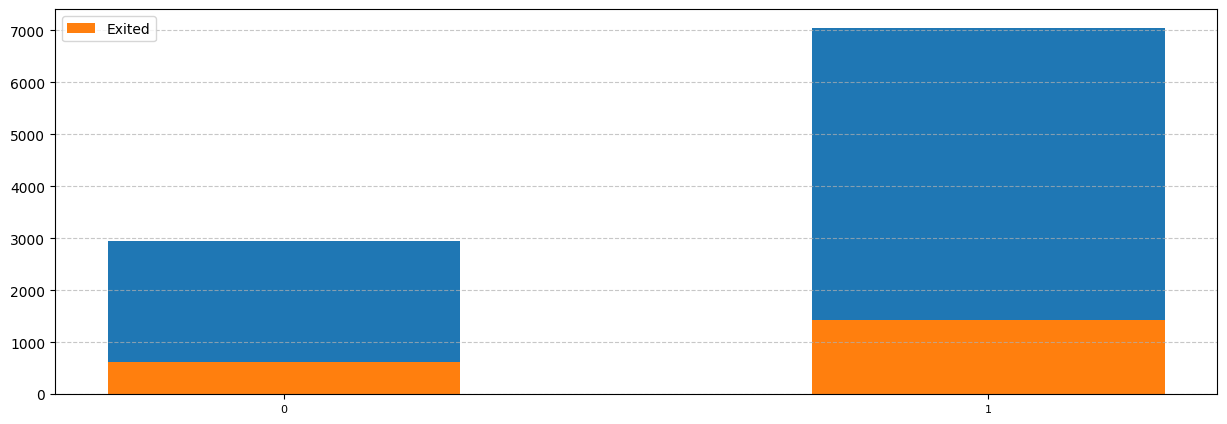

–í—Å–µ–≥–æ 0: 2945
–í—Å–µ–≥–æ Exited_0: 613
–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ 0 –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤: 29.45%
–û—Ç–Ω–æ—à–µ–Ω–∏–µ Exited_0 –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ Exited —Å—Ä–µ–¥–∏ 0: 20.81%
        
–í—Å–µ–≥–æ 1: 7055
–í—Å–µ–≥–æ Exited_1: 1424
–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ 1 –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤: 70.55%
–û—Ç–Ω–æ—à–µ–Ω–∏–µ Exited_1 –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ Exited —Å—Ä–µ–¥–∏ 1: 20.18%
        


In [15]:
crcard_counts = data['HasCrCard'].value_counts().sort_index()
exited_by_crcard = data[data["Exited"]==1]["HasCrCard"].value_counts().sort_index()

fig,ax = plt.subplots(figsize=(15, 5))

bar1 = ax.bar(crcard_counts.index,crcard_counts.values,width=0.5)
bar2 = ax.bar(exited_by_crcard.index,exited_by_crcard.values,width=0.5,label = 'Exited')

plt.xticks(crcard_counts.index,fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend()
plt.show()

for i in range(len(crcard_counts.index)):
    print(f"""–í—Å–µ–≥–æ {crcard_counts.index[i]}: {crcard_counts.iloc[i]}
–í—Å–µ–≥–æ Exited_{crcard_counts.index[i]}: {exited_by_crcard.iloc[i]}
–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ {crcard_counts.index[i]} –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤: {(crcard_counts.iloc[i]/crcard_counts.sum() * 100):.2f}%
–û—Ç–Ω–æ—à–µ–Ω–∏–µ Exited_{crcard_counts.index[i]} –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ Exited —Å—Ä–µ–¥–∏ {crcard_counts.index[i]}: {(exited_by_crcard.iloc[i]/crcard_counts.iloc[i] * 100):.2f}%
        """)

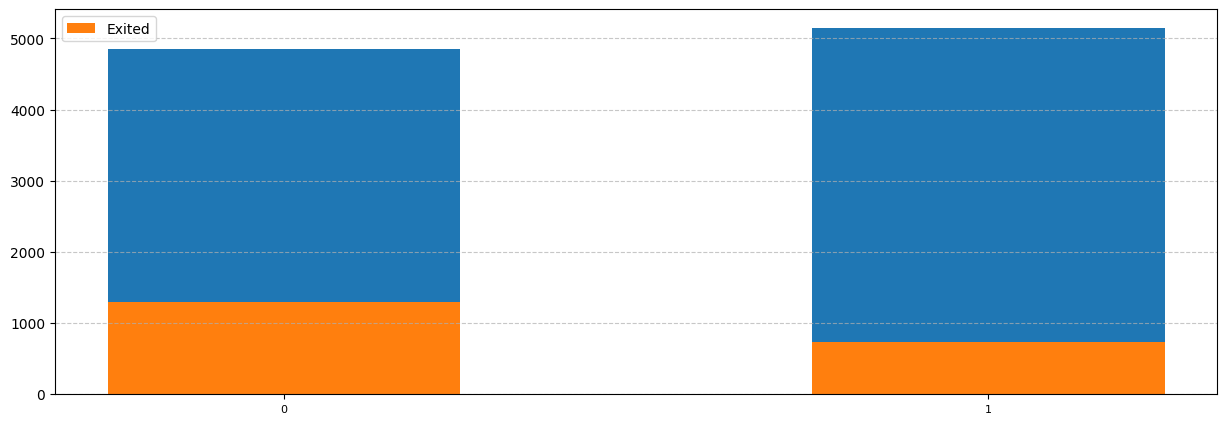

–í—Å–µ–≥–æ 0: 4849
–í—Å–µ–≥–æ Exited_0: 1302
–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ 0 –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤: 48.49%
–û—Ç–Ω–æ—à–µ–Ω–∏–µ Exited_0 –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ Exited —Å—Ä–µ–¥–∏ 0: 26.85%
        
–í—Å–µ–≥–æ 1: 5151
–í—Å–µ–≥–æ Exited_1: 735
–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ 1 –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤: 51.51%
–û—Ç–Ω–æ—à–µ–Ω–∏–µ Exited_1 –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ Exited —Å—Ä–µ–¥–∏ 1: 14.27%
        


In [16]:
active_counts = data['IsActiveMember'].value_counts().sort_index()
exited_by_active = data[data["Exited"]==1]["IsActiveMember"].value_counts().sort_index()

fig,ax = plt.subplots(figsize=(15, 5))

bar1 = ax.bar(active_counts.index,active_counts.values,width=0.5)
bar2 = ax.bar(exited_by_active.index,exited_by_active.values,width=0.5,label = 'Exited')

plt.xticks(active_counts.index,fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend()
plt.show()

for i in range(len(active_counts.index)):
    print(f"""–í—Å–µ–≥–æ {active_counts.index[i]}: {active_counts.iloc[i]}
–í—Å–µ–≥–æ Exited_{active_counts.index[i]}: {exited_by_active.iloc[i]}
–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ {active_counts.index[i]} –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤: {(active_counts.iloc[i]/active_counts.sum() * 100):.2f}%
–û—Ç–Ω–æ—à–µ–Ω–∏–µ Exited_{active_counts.index[i]} –∫ –æ–±—â–µ–º—É –∫–æ–ª-–≤–æ Exited —Å—Ä–µ–¥–∏ {active_counts.index[i]}: {(exited_by_active.iloc[i]/active_counts.iloc[i] * 100):.2f}%
        """)

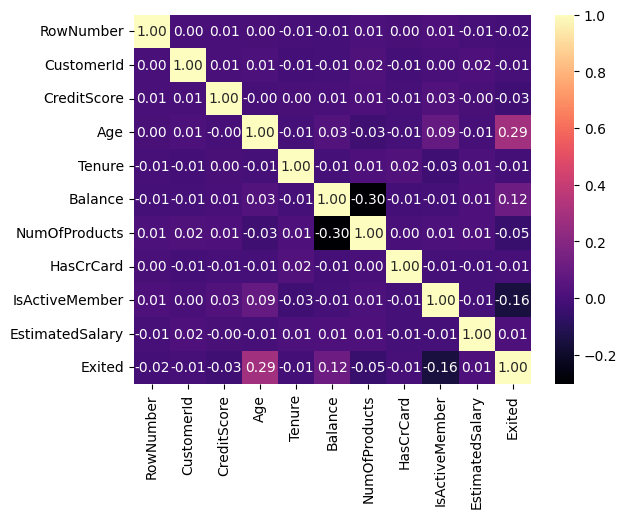

                 RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067   

In [12]:
data_to_corr = data[["RowNumber","CustomerId","CreditScore","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary","Exited"]]
data_corr = data_to_corr.corr()

sns.heatmap(data_corr, annot=True, fmt=".2f", cmap='magma')
plt.show()

print(data_corr)

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
___

In [18]:
#RowNumber,CustomerId,Surname –Ω–µ –ø–æ–º–æ–≥—É—Ç –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –ø–æ—ç—Ç–æ–º—É —É–±–∏—Ä–∞—é –∏ —Ä–∞–∑–¥–µ–ª—è—é –Ω–∞ —Ñ–∏—á–∏ –∏ —Ç–∞—Ä–≥–µ—Ç—ã

x = data.drop(columns=["RowNumber","CustomerId","Surname","Exited"])
y = data["Exited"]

In [19]:
x

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0             1               1        101348.88  
1             0               1        112542.58  
2             1               0        113931.57  
3             0               0         93826.63  
4             1               1         79084.10  
...         ...             ...              ...  
9995          1               0         96270.64  
9996          1               1        101699.77  
9997          0               1         42085.58  
9998          1               0         92888.52  
9999          1               0         38190.78  

[10000 rows x 10 columns]

In [20]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [21]:
#–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
en_x = pd.get_dummies(x,columns=["Geography","Gender","NumOfProducts","HasCrCard","IsActiveMember"])
en_x

CreditScore  Age  Tenure    Balance  EstimatedSalary  Geography_France  \
0             619   42       2       0.00        101348.88              True   
1             608   41       1   83807.86        112542.58             False   
2             502   42       8  159660.80        113931.57              True   
3             699   39       1       0.00         93826.63              True   
4             850   43       2  125510.82         79084.10             False   
...           ...  ...     ...        ...              ...               ...   
9995          771   39       5       0.00         96270.64              True   
9996          516   35      10   57369.61        101699.77              True   
9997          709   36       7       0.00         42085.58              True   
9998          772   42       3   75075.31         92888.52             False   
9999          792   28       4  130142.79         38190.78              True   

      Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  \
0                 False            False           True        False   
1                 False             True           True        False   
2                 False            False           True        False   
3                 False            False           True        False   
4                 False             True           True        False   
...                 ...              ...            ...          ...   
9995              False            False          False         True   
9996              False            False          False         True   
9997              False            False           True        False   
9998               True            False          False         True   
9999              False            False           True        False   

      NumOfProducts_1  NumOfProducts_2  NumOfProducts_3  NumOfProducts_4  \
0                True            False            False            False   
1                True            False            False            False   
2               False            False             True            False   
3               False             True            False            False   
4                True            False            False            False   
...               ...              ...              ...              ...   
9995            False             True            False            False   
9996             True            False            False            False   
9997             True            False            False            False   
9998            False             True            False            False   
9999             True            False            False            False   

      HasCrCard_0  HasCrCard_1  IsActiveMember_0  IsActiveMember_1  
0           False         True             False              True  
1            True        False             False              True  
2           False         True              True             False  
3            True        False              True             False  
4           False         True             False              True  
...           ...          ...               ...               ...  
9995        False         True              True             False  
9996        False         True             False              True  
9997         True        False             False              True  
9998        False         True              True             False  
9999        False         True              True             False  

[10000 rows x 18 columns]

In [22]:
#—Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ train\test

x_train,x_test,y_train,y_test = train_test_split(en_x,y,random_state=random_seed,stratify=y,train_size=0.8)

print(len(x_train)/(len(x_train)+len(x_test)))
print(len(x_test)/(len(x_train)+len(x_test)))
print(len(y_train)/(len(y_train)+len(y_test)))
print(len(y_test)/(len(y_train)+len(y_test)))

0.8
0.2
0.8
0.2



–ú–æ–¥–µ–ª–µ–π –º–Ω–æ–≥–æ, –ø–æ—ç—Ç–æ–º—É —Å—Ç–æ–∏—Ç –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –Ω–∞ –¥–µ—Ñ–æ–ª—Ç–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö, —á—Ç–æ–±—ã –ø–æ–Ω—è—Ç—å –∫–∞–∫–∏–µ —Ç—é–Ω–∏—Ç—å

In [ ]:
xgb1 = xgb.XGBClassifier(objective="binary:logistic",seed = random_seed)
catboost1 = CatBoostClassifier(random_state=random_seed)
logreg1 =LogisticRegression(random_state=random_seed)–∑
rf1 = RandomForestClassifier(random_state=random_seed)

In [24]:
xgb1.fit(x_train,y_train)
catboost1.fit(x_train,y_train)
logreg1.fit(x_train,y_train)
rf1.fit(x_train,y_train)

Learning rate set to 0.025035
0:	learn: 0.6736696	total: 173ms	remaining: 2m 52s
1:	learn: 0.6539784	total: 179ms	remaining: 1m 29s
2:	learn: 0.6363873	total: 186ms	remaining: 1m 1s
3:	learn: 0.6184456	total: 192ms	remaining: 47.8s
4:	learn: 0.6017971	total: 197ms	remaining: 39.2s
5:	learn: 0.5869757	total: 204ms	remaining: 33.8s
6:	learn: 0.5736162	total: 209ms	remaining: 29.7s
7:	learn: 0.5596270	total: 215ms	remaining: 26.7s
8:	learn: 0.5470765	total: 220ms	remaining: 24.2s
9:	learn: 0.5359113	total: 225ms	remaining: 22.2s
10:	learn: 0.5258172	total: 230ms	remaining: 20.7s
11:	learn: 0.5151921	total: 236ms	remaining: 19.4s
12:	learn: 0.5052966	total: 241ms	remaining: 18.3s
13:	learn: 0.4969624	total: 245ms	remaining: 17.3s
14:	learn: 0.4882383	total: 251ms	remaining: 16.5s
15:	learn: 0.4815948	total: 254ms	remaining: 15.6s
16:	learn: 0.4753270	total: 258ms	remaining: 14.9s
17:	learn: 0.4684358	total: 263ms	remaining: 14.4s
18:	learn: 0.4619803	total: 272ms	remaining: 14s
19:	learn: 

RandomForestClassifier(random_state=42)

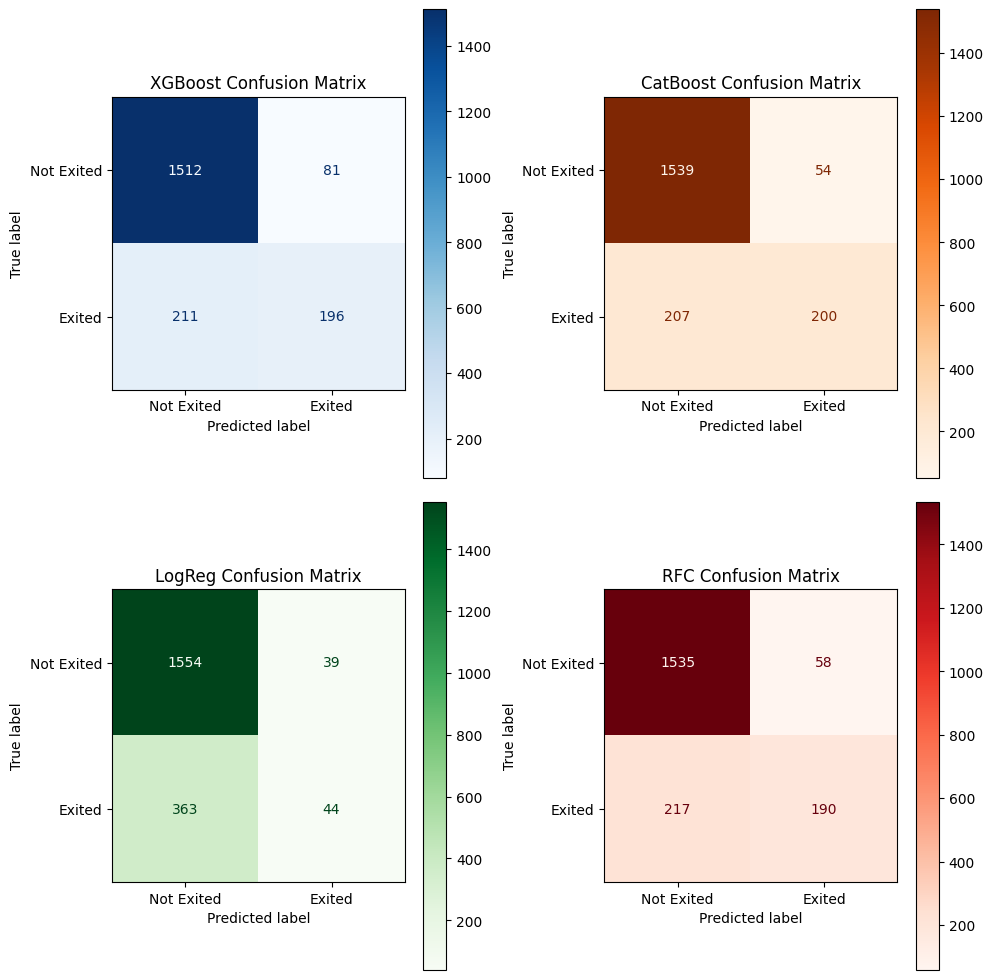

XGB accuracy: 85.39999999999999
Catboost accuracy: 86.95
Logreg accuracy: 79.9
RFC accuracy: 86.25


In [ ]:
xgb_pred1 = xgb1.predict(x_test)
catboost_pred1 = catboost1.predict(x_test)
logreg_pred1 = logreg1.predict(x_test)
rf_pred1 = rf1.predict(x_test)

xgb_cm1 = confusion_matrix(y_test,xgb_pred1)
catboost_cm1 = confusion_matrix(y_test,catboost_pred1)
logreg_cm1 = confusion_matrix(y_test,logreg_pred1)
rfc_cm1 = confusion_matrix(y_test,rf_pred1)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
disp1 = ConfusionMatrixDisplay(confusion_matrix=xgb_cm1, display_labels=['Not Exited', 'Exited'])
disp1.plot(ax=axes[0,0], cmap=plt.cm.Blues)
axes[0,0].set_title('XGBoost Confusion Matrix')

disp2 = ConfusionMatrixDisplay(confusion_matrix=catboost_cm1, display_labels=['Not Exited', 'Exited'])
disp2.plot(ax=axes[0,1], cmap=plt.cm.Oranges)
axes[0,1].set_title('CatBoost Confusion Matrix')

disp3 = ConfusionMatrixDisplay(confusion_matrix=logreg_cm1, display_labels=['Not Exited', 'Exited'])
disp3.plot(ax=axes[1,0], cmap=plt.cm.Greens)
axes[1,0].set_title('LogReg Confusion Matrix')

disp4 = ConfusionMatrixDisplay(confusion_matrix=rfc_cm1, display_labels=['Not Exited', 'Exited'])
disp4.plot(ax=axes[1,1], cmap=plt.cm.Reds)
axes[1,1].set_title('RFC Confusion Matrix')

plt.tight_layout()
plt.show()

xgb_acc1 = accuracy_score(y_test,xgb_pred1)
catboost_acc1 = accuracy_score(y_test,catboost_pred1)
logreg_acc1 = accuracy_score(y_test,logreg_pred1)
rf_acc1 = accuracy_score(y_test,rf_pred1)

print(f"XGB accuracy: {xgb_acc1*100}\nCatboost accuracy: {catboost_acc1*100}")
print(f"Logreg accuracy: {logreg_acc1*100}\nRFC accuracy: {rf_acc1*100}")

–ú–æ–∂–µ–º –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ catboost —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è –ª—É—á—à–µ –≤—Å–µ–≥–æ, –∞ logreg —Ö—É–∂–µ –≤—Å–µ–≥–æ, –ø–æ—ç—Ç–æ–º—É –±—É–¥—É —Ç—é–Ω–∏—Ç—å –ø–µ—Ä–≤—ã–µ —Ç—Ä–∏ –ø–æ —Ç–æ—á–Ω–æ—Å—Ç–∏, —ç—Ç–æ CatBoost,RFC,XGB

–¢—é–Ω–∏—Ç—å –±—É–¥—É —Å –ø–æ–º–æ—â—å—é optuna

In [ ]:
def optimize_xgb(trial):
    n_estimators = trial.suggest_int("n_estimators",50,500)
    learning_rate = trial.suggest_float("learning_rate",0.01,0.2)
    max_depth = trial.suggest_int("max_depth",3,10)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    gamma = trial.suggest_float('gamma',0,8.0)
    reg_lambda = trial.suggest_float('reg_lambda',0,20.0)
    scale_pos_weight = trial.suggest_int('scale_pos_weight',1,10)

    catboost_opti = xgb.XGBClassifier(
        objective="binary:logistic",
        eval_metric = "logloss",
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        learning_rate=learning_rate, 
        min_child_weight=min_child_weight,
        subsample=subsample,
        gamma = gamma, 
        reg_lambda = reg_lambda,
        scale_pos_weight = scale_pos_weight,
        seed = random_seed
    )

    scores = cross_val_score(catboost_opti,x_train,y_train,cv=3,scoring="roc_auc")
    scores = scores.mean()

    return scores

study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(optimize_xgb,n_trials=150)

print(study_xgb.best_params)
print(study_xgb.best_value)

[I 2025-05-03 21:11:24,134] A new study created in memory with name: no-name-75cb449f-cd2b-409d-a564-b9b0c60f17ec
[I 2025-05-03 21:11:24,365] Trial 0 finished with value: 0.8653425891463865 and parameters: {'n_estimators': 84, 'learning_rate': 0.13984055963021627, 'max_depth': 3, 'min_child_weight': 9, 'subsample': 0.9946820518197086, 'gamma': 3.214016977061773, 'reg_lambda': 17.69556424139154, 'scale_pos_weight': 6}. Best is trial 0 with value: 0.8653425891463865.
[I 2025-05-03 21:11:24,651] Trial 1 finished with value: 0.8561697530739192 and parameters: {'n_estimators': 56, 'learning_rate': 0.17233433937912332, 'max_depth': 9, 'min_child_weight': 7, 'subsample': 0.6180563387560343, 'gamma': 4.216916889344891, 'reg_lambda': 1.2567252448256694, 'scale_pos_weight': 3}. Best is trial 0 with value: 0.8653425891463865.
[I 2025-05-03 21:11:25,656] Trial 2 finished with value: 0.8639150428695676 and parameters: {'n_estimators': 352, 'learning_rate': 0.03474819779224991, 'max_depth': 4, 'min_

{'n_estimators': 437, 'learning_rate': 0.02239063683248447, 'max_depth': 4, 'min_child_weight': 3, 'subsample': 0.6654250048745799, 'gamma': 1.2861407342729783, 'reg_lambda': 1.599215573738186, 'scale_pos_weight': 3}
0.8675329130440783


In [30]:
def optimize_catboost(trial):
    iterations = trial.suggest_int("iterations", 50, 500)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.2, log=True)
    depth = trial.suggest_int("depth", 3, 10)
    l2_leaf_reg = trial.suggest_float("l2_leaf_reg", 1, 10)
    border_count = trial.suggest_int("border_count", 32, 128)
    subsample = trial.suggest_float("subsample", 0.5, 1.0)

    model = CatBoostClassifier(
        iterations=iterations,
        learning_rate=learning_rate,
        depth=depth,
        l2_leaf_reg=l2_leaf_reg,
        border_count=border_count,
        subsample=subsample,
        random_seed=random_seed,
        verbose=0
    )

    scores = cross_val_score(model, x_train, y_train, cv=3, scoring="roc_auc")
    scores = scores.mean()

    return scores

study_catboost = optuna.create_study(direction="maximize")
study_catboost.optimize(optimize_catboost, n_trials=150)

print(study_catboost.best_params)
print(study_catboost.best_value)

[I 2025-05-03 21:14:14,092] A new study created in memory with name: no-name-6498b3aa-5ef4-4182-9f9c-deecb9183093
[I 2025-05-03 21:14:17,436] Trial 0 finished with value: 0.8599713954486958 and parameters: {'iterations': 309, 'learning_rate': 0.05592510756250602, 'depth': 8, 'l2_leaf_reg': 9.200342511979079, 'border_count': 38, 'subsample': 0.7682146397208914}. Best is trial 0 with value: 0.8599713954486958.
[I 2025-05-03 21:14:18,666] Trial 1 finished with value: 0.8650090667792854 and parameters: {'iterations': 245, 'learning_rate': 0.12181423039029517, 'depth': 4, 'l2_leaf_reg': 2.2976182058421926, 'border_count': 83, 'subsample': 0.8092436109661341}. Best is trial 1 with value: 0.8650090667792854.
[I 2025-05-03 21:14:23,666] Trial 2 finished with value: 0.864996433540307 and parameters: {'iterations': 317, 'learning_rate': 0.013811150706632015, 'depth': 9, 'l2_leaf_reg': 2.6100302672375024, 'border_count': 116, 'subsample': 0.7464598582387225}. Best is trial 1 with value: 0.8650090

{'iterations': 462, 'learning_rate': 0.029477062666985212, 'depth': 4, 'l2_leaf_reg': 6.5997249512811855, 'border_count': 73, 'subsample': 0.7240870709260575}
0.8702929877266881


In [31]:
def optimize_rf(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    max_depth = trial.suggest_int("max_depth", 3, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2"])
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])
    
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=random_seed
    )
    
    scores = cross_val_score(model, x_train, y_train, cv=3, scoring="roc_auc")
    scores = scores.mean()

    return scores

study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(optimize_rf, n_trials=150)

print(study_rf.best_params)
print(study_rf.best_value)

[I 2025-05-03 21:20:45,116] A new study created in memory with name: no-name-76e3f30c-7a5e-4f19-94c9-f0671f62813d
[I 2025-05-03 21:20:47,559] Trial 0 finished with value: 0.8466876328557119 and parameters: {'n_estimators': 297, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 14, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.8466876328557119.
[I 2025-05-03 21:20:50,865] Trial 1 finished with value: 0.8612507395922347 and parameters: {'n_estimators': 206, 'max_depth': 14, 'min_samples_split': 13, 'min_samples_leaf': 17, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.8612507395922347.
[I 2025-05-03 21:21:00,776] Trial 2 finished with value: 0.8611377506682709 and parameters: {'n_estimators': 497, 'max_depth': 28, 'min_samples_split': 11, 'min_samples_leaf': 18, 'max_features': 'log2', 'bootstrap': False}. Best is trial 1 with value: 0.8612507395922347.
[I 2025-05-03 21:21:04,969] Trial 3 finished with value: 0.860978764021

{'n_estimators': 499, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'bootstrap': True}
0.8626573993229926


In [32]:
#—á—Ç–æ –≤ –∏—Ç–æ–≥–µ
print(f"""
Score XGB: {study_xgb.best_value}
Parametrs XGB: {study_xgb.best_params}
---
Score CatBoost: {study_catboost.best_value}
Parametrs CatBoost: {study_catboost.best_params}
---
Score RF: {study_rf.best_value}
Parametrs RF: {study_rf.best_params}
""")


Score XGB: 0.8675329130440783
Parametrs XGB: {'n_estimators': 437, 'learning_rate': 0.02239063683248447, 'max_depth': 4, 'min_child_weight': 3, 'subsample': 0.6654250048745799, 'gamma': 1.2861407342729783, 'reg_lambda': 1.599215573738186, 'scale_pos_weight': 3}
---
Score CatBoost: 0.8702929877266881
Parametrs CatBoost: {'iterations': 462, 'learning_rate': 0.029477062666985212, 'depth': 4, 'l2_leaf_reg': 6.5997249512811855, 'border_count': 73, 'subsample': 0.7240870709260575}
---
Score RF: 0.8626573993229926
Parametrs RF: {'n_estimators': 499, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'bootstrap': True}



In [33]:
#–æ—Ü–µ–Ω–∏–º –∏—Ö –º–µ—Ç—Ä–∏–∫–∏
xgb_best = xgb.XGBClassifier(**study_xgb.best_params)
catboost_best = CatBoostClassifier(**study_catboost.best_params)
rf_best = RandomForestClassifier(**study_rf.best_params)

In [34]:
xgb_best.fit(x_train,y_train)
catboost_best.fit(x_train,y_train)
rf_best.fit(x_train,y_train)

0:	learn: 0.6696543	total: 2ms	remaining: 924ms
1:	learn: 0.6519625	total: 3.56ms	remaining: 818ms
2:	learn: 0.6333881	total: 6.33ms	remaining: 968ms
3:	learn: 0.6161167	total: 8.26ms	remaining: 946ms
4:	learn: 0.5985236	total: 10.6ms	remaining: 973ms
5:	learn: 0.5822255	total: 12.8ms	remaining: 975ms
6:	learn: 0.5671360	total: 16.7ms	remaining: 1.08s
7:	learn: 0.5558279	total: 19.1ms	remaining: 1.08s
8:	learn: 0.5464917	total: 21.2ms	remaining: 1.07s
9:	learn: 0.5347231	total: 22.9ms	remaining: 1.03s
10:	learn: 0.5235720	total: 24.8ms	remaining: 1.02s
11:	learn: 0.5129558	total: 27ms	remaining: 1.01s
12:	learn: 0.5030626	total: 29.5ms	remaining: 1.02s
13:	learn: 0.4955675	total: 31.4ms	remaining: 1s
14:	learn: 0.4867802	total: 33.4ms	remaining: 996ms
15:	learn: 0.4786192	total: 35.1ms	remaining: 979ms
16:	learn: 0.4717748	total: 36.6ms	remaining: 957ms
17:	learn: 0.4661549	total: 38.3ms	remaining: 946ms
18:	learn: 0.4600366	total: 39.9ms	remaining: 930ms
19:	learn: 0.4549107	total: 41

RandomForestClassifier(max_depth=20, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=499)

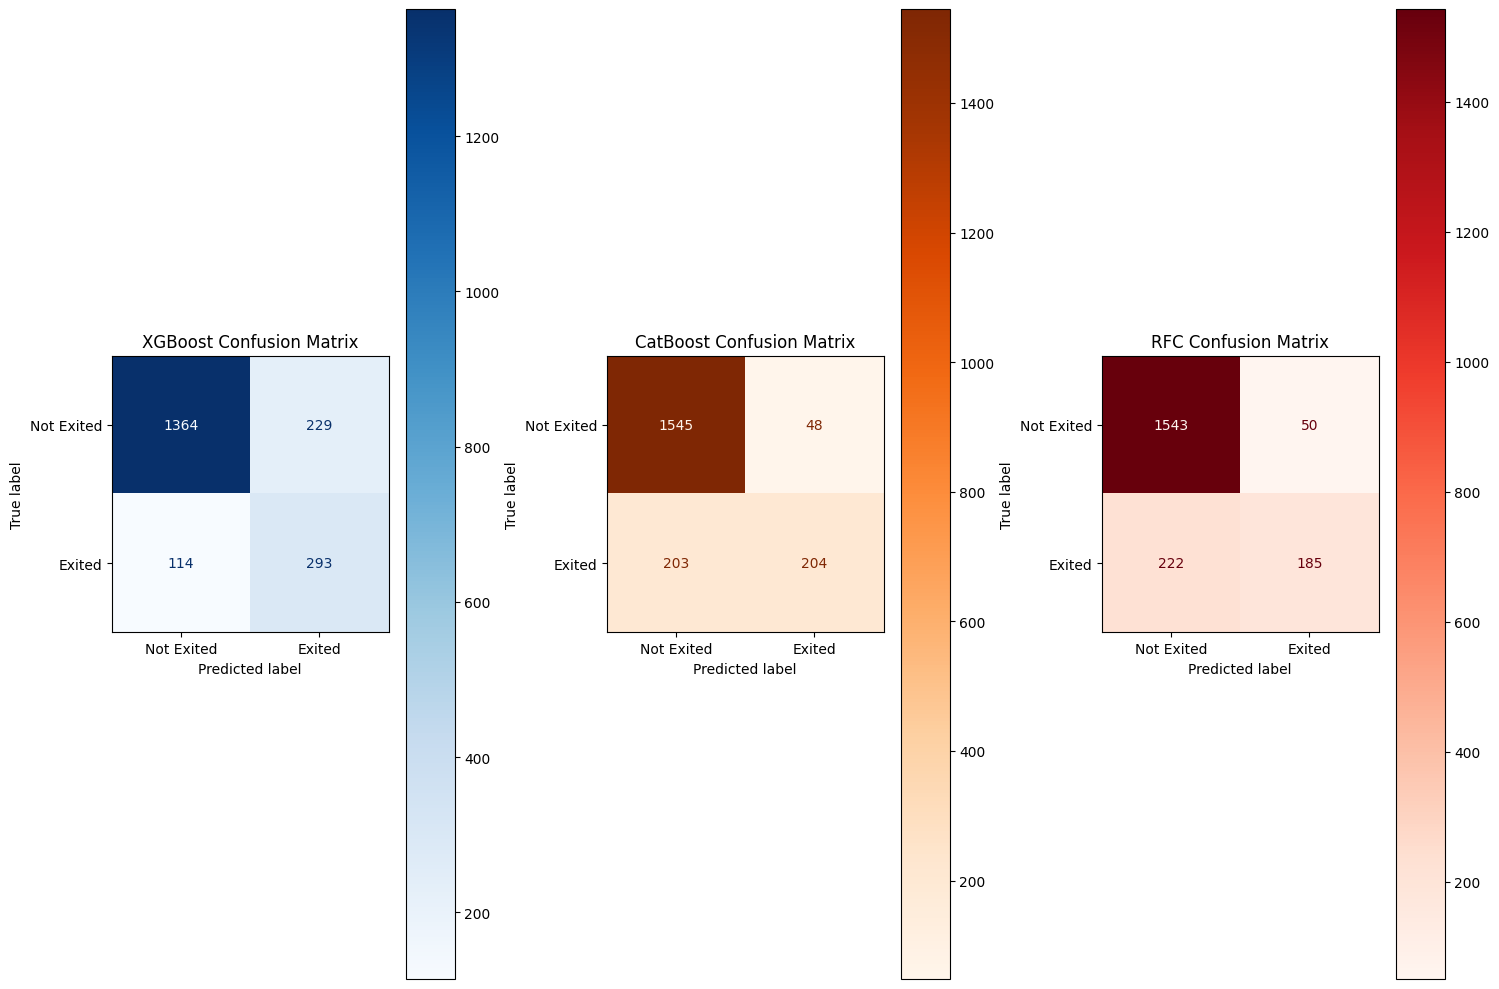

XGB accuracy: 82.85
Catboost accuracy: 87.45
RFC accuracy: 86.4
---
Precision:
 XGB: 0.5613026819923371
CatBoost: 0.8095238095238095
 RF: 0.7872340425531915
---
Recall:
 XGB: 0.7199017199017199
CatBoost: 0.5012285012285013
 RF: 0.45454545454545453
---
F1:
 XGB: 0.6307857911733046
CatBoost: 0.6191198786039454
 RF: 0.5763239875389408
---
roc_auc:
 XGB: 0.7880738982433898
CatBoost: 0.7355483372432525
 RF: 0.711579067511271


In [49]:
xgb_best_pred = xgb_best.predict(x_test)
catboost_best_pred = catboost_best.predict(x_test)
rf_best_pred = rf_best.predict(x_test)

xgb_best_cm = confusion_matrix(y_test,xgb_best_pred)
catboost_best_cm = confusion_matrix(y_test,catboost_best_pred)
rf_best_cm = confusion_matrix(y_test,rf_best_pred)

fig, axes = plt.subplots(1, 3, figsize=(15, 10))
disp1 = ConfusionMatrixDisplay(confusion_matrix=xgb_best_cm, display_labels=['Not Exited', 'Exited'])
disp1.plot(ax=axes[0], cmap=plt.cm.Blues)
axes[0].set_title('XGBoost Confusion Matrix')

disp2 = ConfusionMatrixDisplay(confusion_matrix=catboost_best_cm, display_labels=['Not Exited', 'Exited'])
disp2.plot(ax=axes[1], cmap=plt.cm.Oranges)
axes[1].set_title('CatBoost Confusion Matrix')

disp3 = ConfusionMatrixDisplay(confusion_matrix=rf_best_cm, display_labels=['Not Exited', 'Exited'])
disp3.plot(ax=axes[2], cmap=plt.cm.Reds)
axes[2].set_title('RFC Confusion Matrix')

plt.tight_layout()
plt.show()

xgb_best_acc = accuracy_score(y_test,xgb_best_pred)
catboost_best_acc = accuracy_score(y_test,catboost_best_pred)
rf_best_acc = accuracy_score(y_test,rf_best_pred)

xgb_prescision = precision_score(y_test,xgb_best_pred)
catboost_precision = precision_score(y_test,catboost_best_pred)
rf_precision = precision_score(y_test,rf_best_pred)

xgb_recall = recall_score(y_test,xgb_best_pred)
catboost_recall = recall_score(y_test,catboost_best_pred)
rf_recall = recall_score(y_test,rf_best_pred)

xgb_f1 = f1_score(y_test,xgb_best_pred)
catboost_f1 = f1_score(y_test,catboost_best_pred)
rf_f1 = f1_score(y_test,rf_best_pred)

xgb_roc = roc_auc_score(y_test,xgb_best_pred)
catboost_roc = roc_auc_score(y_test,catboost_best_pred)
rf_roc = roc_auc_score(y_test,rf_best_pred)

print(f"XGB accuracy: {xgb_best_acc*100}\nCatboost accuracy: {catboost_best_acc*100}\nRFC accuracy: {rf_best_acc*100}")
print("---")
print(f"Precision:\n XGB: {xgb_prescision}\nCatBoost: {catboost_precision}\n RF: {rf_precision}")
print("---")
print(f"Recall:\n XGB: {xgb_recall}\nCatBoost: {catboost_recall}\n RF: {rf_recall}")
print("---")
print(f"F1:\n XGB: {xgb_f1}\nCatBoost: {catboost_f1}\n RF: {rf_f1}")
print("---")
print(f"roc_auc:\n XGB: {xgb_roc}\nCatBoost: {catboost_roc}\n RF: {rf_roc}")

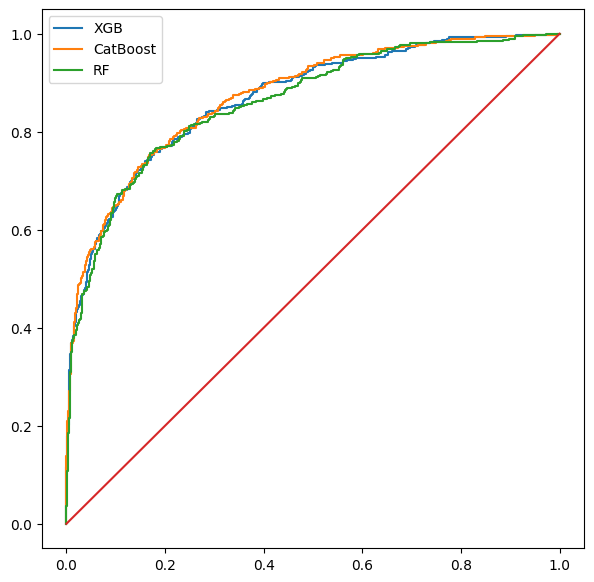

In [36]:
plt.figure(figsize=(7,7))

for name,model in [("XGB",xgb_best),("CatBoost",catboost_best),("RF",rf_best)]:
    pred_proba = model.predict_proba(x_test)[:,1]
    fpr,tpr,_ = roc_curve(y_test,pred_proba)
    auc_score = roc_auc_score(y_test,pred_proba)

    plt.plot(fpr,tpr,label = f"{name}")

plt.plot([0,1],[0,1])
plt.legend()
plt.show()

### –ú–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥ -> Catboost –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å–µ–±—è –ª—É—á—à–µ –¥—Ä—É–≥–∏—Ö –º–æ–¥–µ–ª–µ–π, –ø–æ—ç—Ç–æ–º—É –±—É–¥–µ–º –ø–æ–∫–∞–∑—ã–≤–∞—Ç—å –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—é —ç—Ç–æ–π –º–æ–¥–µ–ª–∏

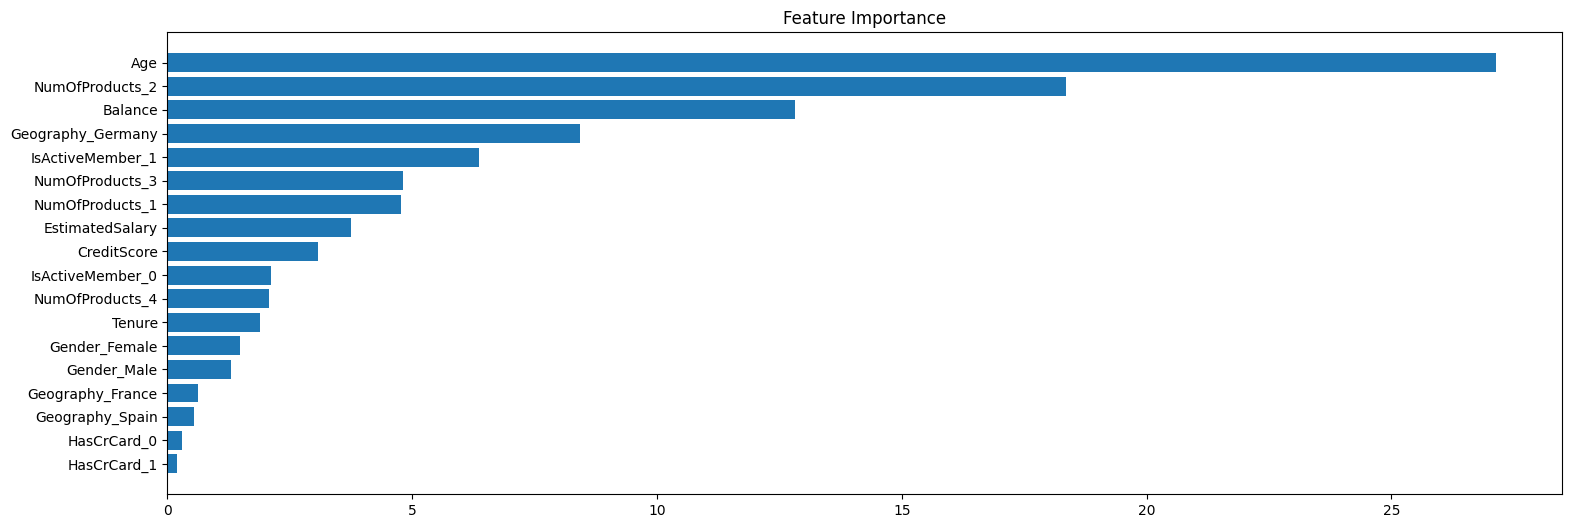

In [37]:
importance = catboost_best.feature_importances_
indices = importance.argsort()

plt.figure(figsize=(18, 6))
plt.barh(range(len(indices)), importance[indices])
plt.yticks(range(len(indices)), x_test.columns[indices])
plt.title('Feature Importance')
plt.show()

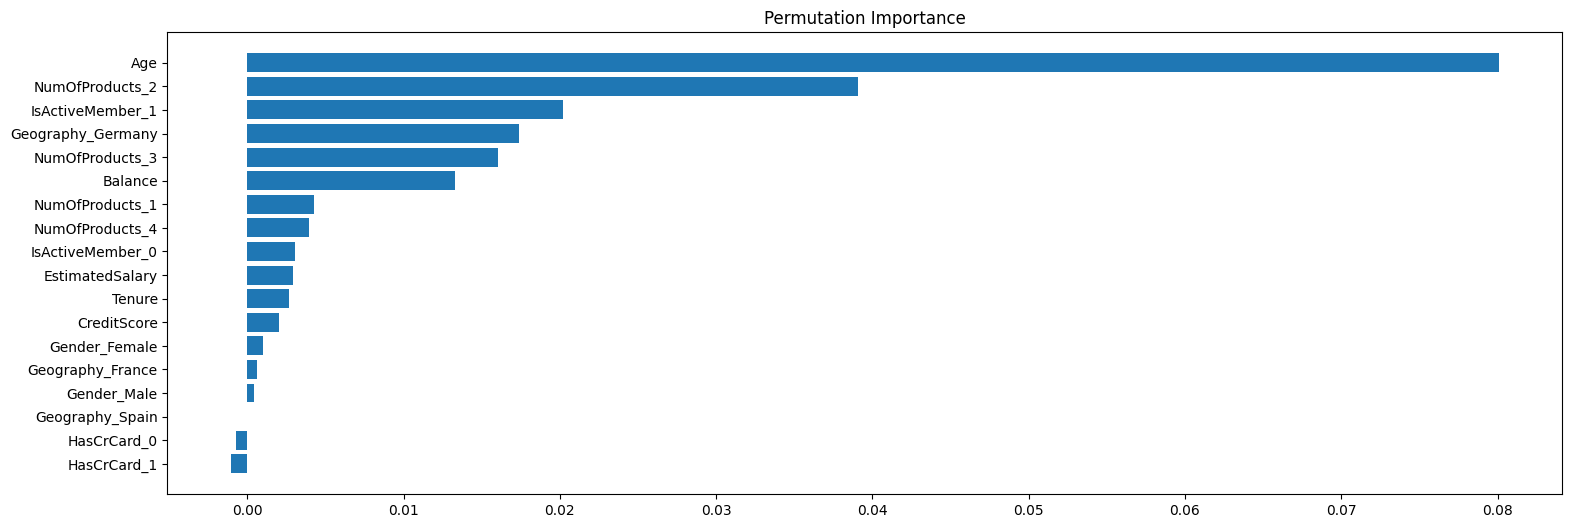

In [ ]:
perm_importance = permutation_importance(catboost_best, x_test, y_test, n_repeats=10, random_state=random_seed)
indices = perm_importance.importances_mean.argsort()

plt.figure(figsize=(18, 6))
plt.barh(range(len(indices)), perm_importance.importances_mean[indices])
plt.yticks(range(len(indices)), x_test.columns[indices])
plt.title('Permutation Importance')
plt.show()

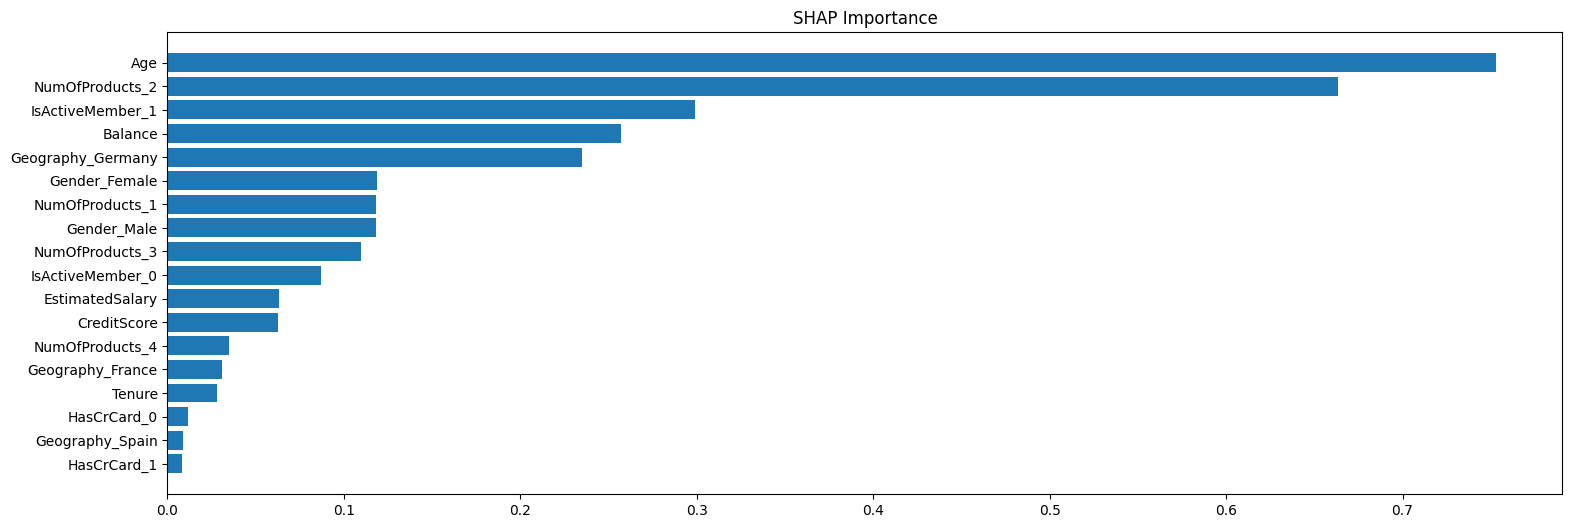

In [39]:
explainer = shap.Explainer(catboost_best)
shap_values = explainer(x_test)
shap_importance = shap_values.abs.mean(0).values
indices = shap_importance.argsort()

plt.figure(figsize=(18, 6))
plt.barh(range(len(indices)), shap_importance[indices])
plt.yticks(range(len(indices)), x_test.columns[indices])
plt.title('SHAP Importance')
plt.show()

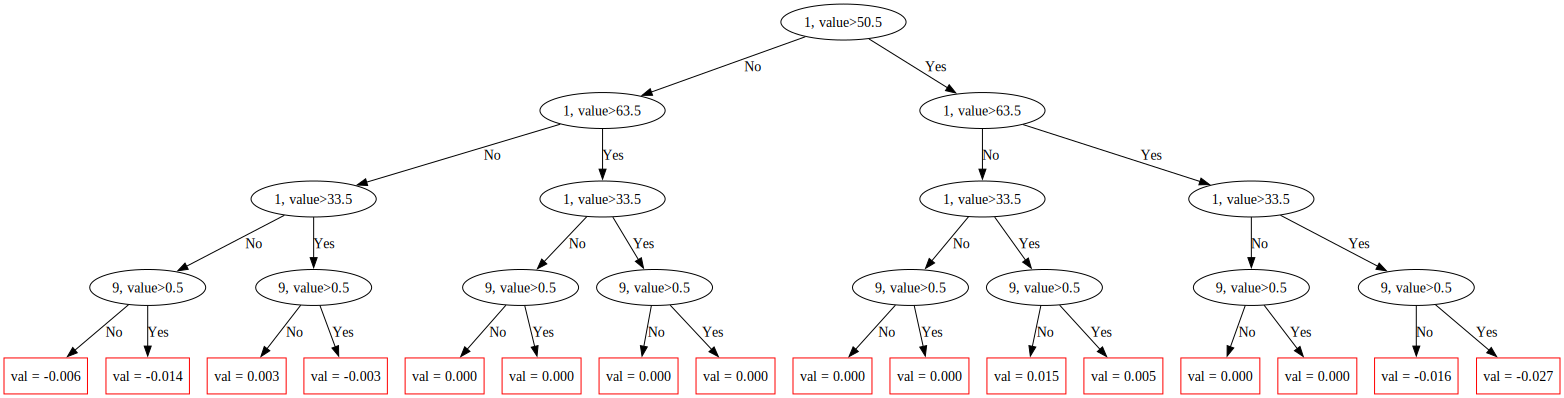

In [48]:
catboost_best.plot_tree(tree_idx=100)